\title{\textbf{\fontsize{24pt}{30pt} Projekt zaliczeniowy \break \break  Uczenie maszynowe i sztuczna inteligencja w finansach \break}}  
\vspace{50pt}  
\author{Alan Śliwiński \\ 89575 \and name2 \\ album2 \and imie \\ album3}  
\date{28 stycznia 2024}  
\maketitle

\vspace{100pt}
\large{\textbf moj text}
\vspace{200pt}  
\renewcommand{\contentsname}{Spis treści}

\tableofcontents

\pagebreak

# Biblioteki i dane

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv(
    "otomoto.csv",
    usecols=[
        "TYTUŁ",
        "ROK_PRODUKCJI",
        "PRZEBIEG_KM",
        "POJEMNOŚĆ_SILNIKA_CM3",
        "PALIWO",
        "MIASTO",
        "WOJEWODZTWO",
        "CENA",
        "WALUTA",
    ],
)

In [55]:
df.columns

Index(['TYTUŁ', 'MARKA', 'ROK_PRODUKCJI', 'PRZEBIEG_KM',
       'POJEMNOŚĆ_SILNIKA_CM3', 'PALIWO', 'MIASTO', 'WOJEWODZTWO', 'CENA',
       'WALUTA'],
      dtype='object')

# Explolatory data analysis

In [56]:
df.describe().astype(int)

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
count,133434,133428,151147,151360
mean,2012,163780,1937,58182
std,6,92678,836,65131
min,1937,1,480,1250
25%,2009,94296,1469,17900
50%,2012,179010,1798,35800
75%,2017,224000,1997,74999
max,2023,1943000,7990,1966770


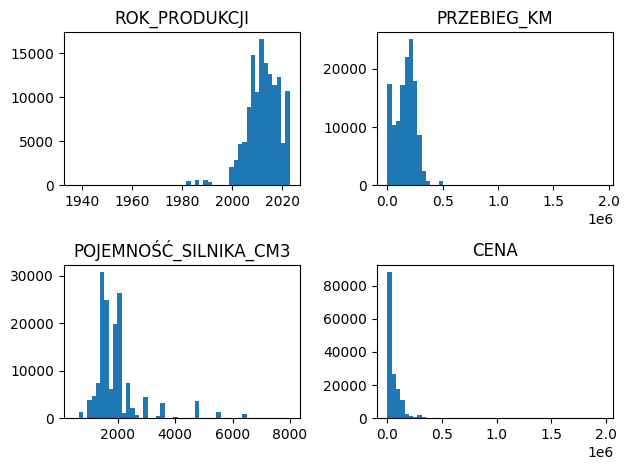

In [72]:
fig, ax = plt.subplots(2, 2)

for i, stat in enumerate(("ROK_PRODUKCJI", "PRZEBIEG_KM", "POJEMNOŚĆ_SILNIKA_CM3", "CENA")):
    div, mod = divmod(i, 2)

    ax[div, mod].hist(df[stat], bins=50)
    ax[div, mod].set_title(stat)

plt.tight_layout()
plt.show()

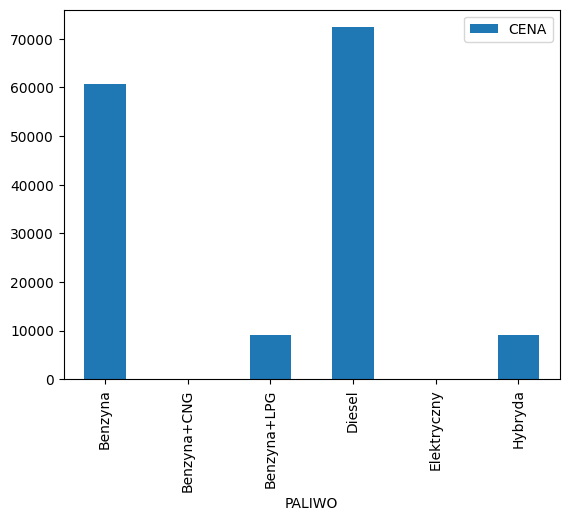

In [101]:
df.groupby('PALIWO')[['CENA']].count().plot.bar()
plt.show()

In [45]:
df.groupby("WOJEWODZTWO").CENA.describe().astype(int).sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
WOJEWODZTWO,,,,,,,,
Mazowieckie,26654,83625,68158,3000,22900,70000,155890,1499999
Wielkopolskie,25606,44592,58033,1250,9900,28900,55000,1966770
Dolnośląskie,19225,43793,41021,1600,9750,28500,87000,699999
Małopolskie,16085,42219,48352,2000,17900,26900,51900,1289000
Świętokrzyskie,11331,71837,30127,4400,56999,74999,96500,639000
Śląskie,11195,79787,108564,2450,15990,28200,85900,1080000
Lubuskie,7625,42991,24576,2900,33500,38400,64500,790000
Lubelskie,6853,46316,36390,2800,27800,36700,40000,445000
Zachodniopomorskie,5938,40756,36537,2699,19500,27900,63900,1070425


In [103]:
df.corr(numeric_only=True)

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
ROK_PRODUKCJI,1.000000,-0.640153,-0.017929,0.609579
PRZEBIEG_KM,-0.640153,1.000000,0.087712,-0.641472
POJEMNOŚĆ_SILNIKA_CM3,-0.017929,0.087712,1.000000,0.220832
CENA,0.609579,-0.641472,0.220832,1.000000


In [26]:
df.loc[0, 'TYTUŁ']

'Skoda Superb 2.0 Comfort'

In [28]:
df.insert(1, 'MARKA', df.TYTUŁ.str.split(' ').str[0])

# Model